# Scraping Data From Box Office Mojo https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import datetime as dt
from bs4 import BeautifulSoup as bs
import requests

In [2]:
source2 = requests.get('https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW').text
soup2 = bs(source2, 'lxml')
film_url = [] # We'll use the URL paths in this list to gather additional information about each film

film_id = soup2.find_all('a')
count = 0

for item in film_id[19:419]:
    count += 1
    if count % 2 != 0:
        film_url.append(item.get('href'))
    

In [3]:
film_title = soup2.find_all('td', class_='a-text-left mojo-field-type-title')
film_gross = soup2.find_all('td', class_='a-text-right mojo-field-type-money')
film_ls = []
film_life_time_gross_ls = []

for title in film_title:
    film_ls.append(title.text)

for grossed in film_gross:
    film_life_time_gross_ls.append(grossed.text)


In [4]:
top_grossing_movie_dict = {'Film': film_ls,
                          'Lifetime_Gross': film_life_time_gross_ls}

movie_df = pd.DataFrame(top_grossing_movie_dict)
movie_df.head()

,Film,Lifetime_Gross
0,Avengers: Endgame,"$2,797,800,564"
1,Avatar,"$2,789,958,507"
2,Titanic,"$2,187,463,944"
3,Star Wars: Episode VII - The Force Awakens,"$2,068,223,624"
4,Avengers: Infinity War,"$2,048,359,754"


In [5]:
film_domestic_distributor_ls = []

# Generates a list of film distribution companies associated with the top 200 grossing films of all time
def domestic_distributor(a_list): 
    for path in a_list:
        film_credits_url = requests.get('https://www.boxofficemojo.com'+path).text
        soup3 = bs(film_credits_url, 'lxml')
        film_credits_list = soup3.find_all('div', class_='a-section a-spacing-none')
        for distributor in film_credits_list[4:5]:
            company = distributor.text
            if 'Domestic Distributor' in company:
                company = company.replace('Domestic Distributor','')
            if 'See full company information' in company:
                company = company.replace('See full company information', '')
            film_domestic_distributor_ls.append(company)
        
        
domestic_distributor(film_url)

In [14]:
def replace_n(string):
    for i, item in enumerate(string):
        if '\n' in item:
            string.remove(string[i])
            string.insert(i, item.replace('\n',''))
            
replace_n(film_domestic_distributor_ls)
film_domestic_distributor_ls

['Walt Disney Studios Motion Pictures',
 'Twentieth Century Fox',
 'Paramount Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Universal Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Universal Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Warner Bros.',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Universal Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Universal Pictures',
 'Walt Disney Studios Motion Pictures',
 'Universal Pictures',
 'Walt Disney Studios Motion Pictures',
 'Warner Bros.',
 'Sony Pictures Releasing',
 'Walt Disney Studios Motion Pictures',
 'DreamWorks',
 'New Line Cinema',
 'Sony Pictures Releasing',
 'Paramount Pictures',
 'Warner Bros.',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pi

In [13]:
movie_df['Domestic_Distributor'] = film_domestic_distributor_ls
movie_df.to_excel('TopGrossingFilms.xlsx')

#### As you'll see we are reading a new excel file into the notebook (TGF.xlsx). I did this because I had to clean up the data that I scrapped from the web. In this file you'll see I've added a new column titled Director.

#### In the following section of the notebook we will build a basic pie chart to assess who is the top grossing director of all time.

In [15]:
top_grossing_film_df = pd.read_excel('TGF.xlsx')

In [16]:
top_grossing_film_df.drop(columns='Unnamed: 0', inplace=True)

#This new list has the dublicate names removed
director_list= list(dict.fromkeys(top_grossing_film_df['Director']))

In [17]:
top_grossing_film_df.set_index(['Director','Film'], inplace=True)
top_grossing_film_df.sort_index(inplace=True)

In [18]:
top_grossing_film_df

Lifetime_Gross  \
Director                                    Film                                                                 
Alan Taylor                                 Thor: The Dark World                                     644783140   
Alejandro G. Iñárritu                       The Revenant (2015 film)                                 532950503   
Alfonso Cuarón                              Gravity (2013 film)                                      723192705   
                                            Harry Potter and the Prisoner of Azkaban (film)          796093802   
Andrew Adamson                              The Chronicles of Narnia: The Lion, the Witch a...       745013115   
Andrew Adamson, Kelly Asbury, Conrad Vernon Shrek 2                                                  923075336   
Andrew Stanton                              Finding Dory                                            1028570889   
                                            Finding Nemo                                             940343261   
Andy Muschietti                             It (2017 film)                                           700449318   
Ang Lee                                     Life of Pi (film)                                        609016565   
Anna Boden, Ryan Fleck                      Captain Marvel (film)                                   1128274794   
Anthony Russo, Joe Russo                    Avengers: Endgame                                       2797800564   
                                            Avengers: Infinity War                                  2048359754   
                                            Captain America: Civil War                              1153296293   
                                            Captain America: The Winter Soldier                      714421503   
Barry Sonnenfeld                            Men in Black (1997 film)                                 589390539   
                                            Men in Black 3                                           624026776   
Bill Condon                                 Beauty and the Beast (2017 film)                        1263521126   
                                            The Twilight Saga: Breaking Dawn - Part 1                712205856   
                                            The Twilight Saga: Breaking Dawn - Part 2                829746820   
Bob Peterson, Pete Docter                   Up (2009 film)                                           735099082   
Brad Bird                                   Incredibles 2                                           1242805359   
                                            Mission: Impossible - Ghost Protocol                     694713380   
                                            Ratatouille (film)                                       623722818   
                                            The Incredibles                                          631606713   
Bryan Singer                                Bohemian Rhapsody (film)                                 903655259   
                                            X-Men: Apocalypse                                        543934105   
                                            X-Men: Days of Future Past                               746045700   
Byron Howard, Rich Moore                    Zootopia                                                1023784195   
Carlos Saldanha                             Ice Age: Dawn of the Dinosaurs                           886686817   
...                                                                                                        ...   
Ruben Fleischer                             Venom (2018 film)                                        856085151   
Ryan Coogler                                Black Panther (film)                                    1346913161   
Sam Mendes                                  Skyfall                                                 110856

In [19]:
top_grossing_director_dict = {}
def top_grossing_director(a_list):
    for director in director_list:
        top_grossing_director_dict[director]= top_grossing_film_df.loc[director]['Lifetime_Gross'].sum()

top_grossing_director(director_list)

In [20]:
director_gross = pd.DataFrame.from_dict(top_grossing_director_dict,
                                    orient='index',
                                    columns= ['Total_Grossed'])
director_gross.sort_values(by='Total_Grossed', ascending=False, inplace=True)

In [21]:
director_gross.reset_index(inplace=True)

In [22]:
director_gross

,index,Total_Grossed
0,"Anthony Russo, Joe Russo",6713878114
1,Peter Jackson,6402424728
2,David Yates,5643299165
3,"James Cameron, Jon Landau",4977422451
4,Michael Bay,4932996569
5,Steven Spielberg,4403135431
6,Jon Favreau,3832793572
7,Christopher Nolan,3593341803
8,Joss Whedon,3579543151
9,George Lucas,3302066764


In [23]:
ordered_director_list = director_gross['index'].tolist()
ordered_gross_list = director_gross['Total_Grossed'].tolist()

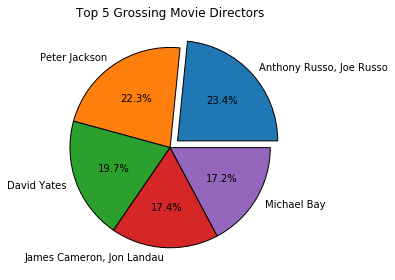

In [24]:
plt.pie(ordered_gross_list[:5], labels=ordered_director_list[:5],
        explode=[0.1,0,0,0,0],
        autopct='%1.1f%%',
       wedgeprops={'edgecolor':'black'})
plt.title('Top 5 Grossing Movie Directors')
plt.tight_layout()
plt.show()